In [488]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from pandas.tseries.offsets import DateOffset
import datetime as dt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [331]:
file=r"C:\Users\Madhujit\Desktop\train.csv"

In [332]:
df=pd.read_csv(file)

In [333]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [334]:
df.columns=df.columns.str.replace(" ","_")

In [335]:
df.columns=df.columns.str.lower()

In [336]:
df["postal_code"]=df["postal_code"].fillna(42420)

In [337]:
from  sklearn.preprocessing import LabelEncoder


In [338]:
encode=LabelEncoder()

In [339]:
df.select_dtypes(include="object").columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'region',
       'product_id', 'category', 'sub-category', 'product_name'],
      dtype='object')

In [340]:
col=['order_id', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'region',
       'product_id', 'category', 'sub-category', 'product_name']

In [341]:
for i in col:
    df[i]=encode.fit_transform(df[i])

In [342]:
df["order_date"]=pd.to_datetime(df["order_date"])
df["ship_date"]=pd.to_datetime(df["ship_date"])

C:\Users\Madhujit\AppData\Local\Temp\ipykernel_11644\662191188.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["order_date"]=pd.to_datetime(df["order_date"])
C:\Users\Madhujit\AppData\Local\Temp\ipykernel_11644\662191188.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["ship_date"]=pd.to_datetime(df["ship_date"])


In [343]:
df["mean"]=df["sales"].mean()

In [344]:
df["std"]=df["sales"].std()

In [345]:
df["month"]=df["order_date"].dt.month
df["week"]=df["order_date"].dt.week
df["shipmonth"]=df["ship_date"].dt.month
df["shipweek"]=df["ship_date"].dt.week

C:\Users\Madhujit\AppData\Local\Temp\ipykernel_11644\2264027779.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"]=df["order_date"].dt.week
C:\Users\Madhujit\AppData\Local\Temp\ipykernel_11644\2264027779.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["shipweek"]=df["ship_date"].dt.week


In [346]:
df["weekday"]=df["order_date"].dt.weekday

In [347]:
df["is_holiday"]=df["weekday"].apply(lambda x: 1 if x==6 else 0)

In [348]:
df["time_to_complete_order"]=df["order_date"]-df["ship_date"]

In [349]:
order_count=df.groupby("customer_id")["order_id"].count().reset_index()

In [350]:
order_count.columns=["customer_id","order_freq"]

In [351]:
df=pd.merge(df,order_count,on="customer_id",how="left")

In [352]:
total_amount=df.groupby("order_id")["sales"].sum().reset_index()
total_amount.columns=["order_id","total_sale"]

In [353]:
df=pd.merge(df,total_amount,on="order_id",how="left")

In [144]:
x=df.drop(["sales"],axis=1)
y=df["sales"]

In [355]:
x.drop(["order_date","ship_date"],axis=1,inplace=True)

In [356]:
x["time_to_complete_order"]=x["time_to_complete_order"].astype("int64")

In [357]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [404]:
reg=RandomForestRegressor()
reg.fit(x_train_scale,y_train)


RandomForestRegressor()

In [405]:
import_dict=dict(zip(reg.feature_importances_ ,x_train.columns))

In [406]:
sorted(import_dict,reverse=True)

[0.37081387184943637,
 0.15288502022037515,
 0.13498305620296744,
 0.07660225336079216,
 0.057717165026620644,
 0.03311361958023867,
 0.026491971010263644,
 0.02528704441942666,
 0.025204055102064932,
 0.023418833776931804,
 0.01971454564231439,
 0.019578720217991997,
 0.012643427368082182,
 0.007629043864044197,
 0.004860436059176067,
 0.004499370752363626,
 0.003560058747640753,
 0.0009975067992695002,
 0.0]

In [407]:
for value,columns in sorted(import_dict.items(),reverse=True):
    if value>0.007629043864044197:
        
        print(columns)

total_sale
product_name
category
sub-category
row_id
week
order_id
customer_name
postal_code
order_freq
time_to_complete_order
city
state


In [408]:
selected_col=["total_sale",
"product_name",
"category",
"sub-category",
"row_id",
"week",
"order_id",
"customer_name",
"postal_code",
"order_freq",
"time_to_complete_order",
"city",
"state"]

In [369]:
corr=x.corr()

In [384]:
thresold=0.80
data=[]
for i in range(len(corr.columns)):
    for j in range(i+1,len(corr.columns)):
        if abs(corr.iloc[i,j])>thresold:
            data.append((corr.columns[i],corr.columns[j]))
print(data)
            
            

[('customer_id', 'customer_name'), ('product_id', 'category'), ('month', 'week')]


In [393]:
col=["customer_id","product_id","month"]

In [396]:
x1=x.drop(["customer_id","product_id","month"],axis=1)

In [398]:
x1["time_to_complete_order"]=x1["time_to_complete_order"].astype("int64")

In [410]:
x1=x1[selected_col]

In [411]:
x_train,x_test,y_train,y_test=train_test_split(x1,y)

In [412]:
scaler = StandardScaler()
x_train_scale= scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [222]:
pca=PCA(n_components=5)
final_x_train=pd.DataFrame(pca.fit_transform(x_train_scale))
                           
final_x_test=pd.DataFrame(pca.transform(x_test_scale))

In [413]:
models = [
    ('Decission Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),('xgboost',xgb.XGBRegressor()),("lgb",lgb.LGBMRegressor()),
    ("linear_regression",LinearRegression()),("SVR",SVR())]


In [414]:

for model_name, model in models:
    model.fit(x_train_scale,y_train)
    y_pred=model.predict(x_test_scale)
    score=r2_score(y_test,y_pred)
    print(f"{model_name},score:{score}")
    

Decission Regression,score:0.11770484223376743
Random Forest Regression,score:0.504088643771853
xgboost,score:0.5455740670948535
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 7350, number of used features: 13
[LightGBM] [Info] Start training from score 230.491613
lgb,score:0.5143352732619717
linear_regression,score:0.2711093720376283
SVR,score:-0.04084327656211584


In [511]:
from scipy.stats import randint,uniform


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]}


In [512]:
reg=xgb.XGBRegressor()

In [513]:
random_cv=RandomizedSearchCV(reg,param_grid,n_iter=100,cv=5,scoring='neg_mean_absolute_error')



In [514]:
random_cv.fit(x_train_scale,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5]},
                   scoring='neg_mean_absolute_error')

In [515]:
random_cv.best_params_

{'reg_lambda': 0,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.1}

In [516]:
reg=xgb.XGBRegressor(reg_lambda= 0,
 reg_alpha= 0.1,
 n_estimators= 100,
 max_depth= 7,
 learning_rate= 0.1)

In [517]:
model=reg.fit(x_train_scale,y_train)

In [518]:
y_pred=model.predict(x_test_scale)

In [519]:
y_pred_data=pd.DataFrame(y_pred,columns=["forecast"]).reset_index()

In [520]:
y_test_data=pd.DataFrame(y_test).reset_index()


In [521]:
for_visu=pd.concat([y_test_data,y_pred_data],axis=1)

In [522]:
mae(y_test,y_pred)

154.65976292014008

In [523]:
r2_score(y_test,y_pred)

0.539231733573087

In [524]:
lower_bound = y_pred - 1.96 *std
print(pd.DataFrame(lower_bound))
upper_bound=y_pred +1.96 *std
print(pd.DataFrame(upper_bound))

                0
0     -624.912415
1     -777.650146
2    -1014.170837
3     -771.784119
4     -944.684204
...           ...
2445  -998.816833
2446  -921.638611
2447  -932.232849
2448  -710.703003
2449  -893.399902

[2450 rows x 1 columns]
                0
0     1321.855225
1     1169.117432
2      932.596741
3     1174.983521
4     1002.083374
...           ...
2445   947.950745
2446  1025.128906
2447  1014.534729
2448  1236.064575
2449  1053.367676

[2450 rows x 1 columns]


<Axes: >

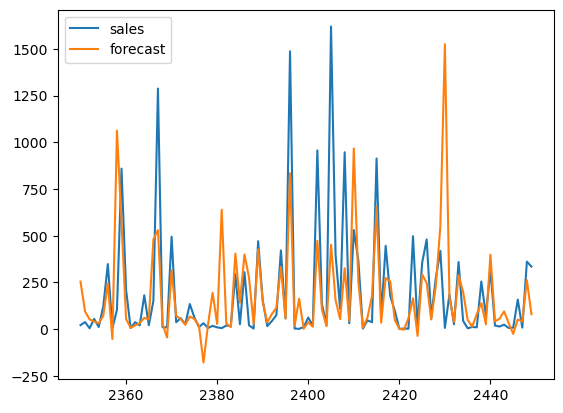

In [528]:
for_visu[["sales","forecast"]][2350:2450].plot()